# CREDIT EDA ASSIGNMENT

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df_app=pd.read_csv('application_data.csv')
df_prev=pd.read_csv('previous_application.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Checking Structure of the Data

In [4]:
#Checking rows and columns
df_app.shape

(307511, 122)

In [5]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Missing Values Check

In [7]:
#checking missing value percentage of all columns
nullper=df_app.isnull().mean()
nullper.sort_values(ascending=False)

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
FLOORSMIN_MEDI                  0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MODE                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
LANDAREA_MEDI                   0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_ME

In [8]:
#checking columns - missing value >.45
df_app.loc[:,df_app.isnull().mean()>.45].head()

,OWN_CAR_AGE,EXT_SOURCE_1,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,NaN,0.083037,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No
1,NaN,0.311267,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No
2,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#dropping columns which have higher null percentage(greater than .45 are dropping)
df_app=df_app.loc[:,df_app.isnull().mean()<.45]

In [10]:
df_app.shape

(307511, 73)

In [11]:
#checking column which have null percentage value less than .45
nullper=df_app.isnull().mean()
nullper.sort_values(ascending=False)

OCCUPATION_TYPE                0.313455
EXT_SOURCE_3                   0.198253
AMT_REQ_CREDIT_BUREAU_YEAR     0.135016
AMT_REQ_CREDIT_BUREAU_MON      0.135016
AMT_REQ_CREDIT_BUREAU_WEEK     0.135016
AMT_REQ_CREDIT_BUREAU_DAY      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR     0.135016
AMT_REQ_CREDIT_BUREAU_QRT      0.135016
NAME_TYPE_SUITE                0.004201
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_60_CNT_SOCIAL_CIRCLE       0.003320
DEF_60_CNT_SOCIAL_CIRCLE       0.003320
EXT_SOURCE_2                   0.002146
AMT_GOODS_PRICE                0.000904
AMT_ANNUITY                    0.000039
CNT_FAM_MEMBERS                0.000007
DAYS_LAST_PHONE_CHANGE         0.000003
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000
FLAG_CONT_MOBILE               0.000000
NAME_CONTRACT_TYPE             0.000000


# Imputing the missing values.
- for categorical variables - mode will be the best option.
- for numeric variables - median or mean will be the best option

In [12]:
#checking values of OCCUPATION_TYPE
df_app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [13]:
# OCCUPATION_TYPE - impute the missing values using mode (mode is choosing because its a categorical variable)
df_app.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [14]:
#replaced values with mode
df_app.OCCUPATION_TYPE=df_app.OCCUPATION_TYPE.fillna(df_app.OCCUPATION_TYPE.mode()[0])

In [15]:
#confirming no more missing values
df_app.OCCUPATION_TYPE.isnull().sum()

0

In [16]:
#AMT_REQ_CREDIT_BUREAU_YEAR - impute the missing value using mode.As this is count of enquiries in most cases bank will follow same procedure for all customers.
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [17]:
#checking mode it is zero
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]

0.0

In [18]:
df_app.AMT_REQ_CREDIT_BUREAU_YEAR=df_app.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df_app.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0])

In [19]:
df_app.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [20]:
df_app.AMT_REQ_CREDIT_BUREAU_MON=df_app.AMT_REQ_CREDIT_BUREAU_MON.fillna(df_app.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])

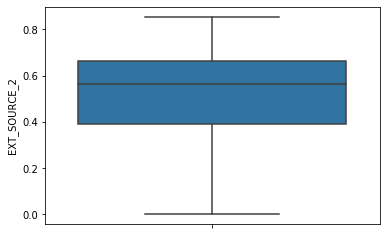

In [21]:
#EXT_SOURCE_2  - Checking any outliers are there in column.
sns.boxplot(data=df_app,y='EXT_SOURCE_2')

In [22]:
df_app.EXT_SOURCE_2 .describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [23]:
#by checking boxplot and describe understood that no outliers for the data.so impute the missing value with mean
df_app.EXT_SOURCE_2 =df_app.EXT_SOURCE_2.fillna(df_app.EXT_SOURCE_2.mean())

In [24]:
df_app.EXT_SOURCE_2.isnull().sum()

0

In [25]:
# AMT_GOODS_PRICE - impute the missing value with median( median is choosing because, it will less influenced for outliers )
df_app.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

In [26]:
df_app.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [27]:
#replacing missing values with median
df_app.AMT_GOODS_PRICE=df_app.AMT_GOODS_PRICE.fillna(df_app.AMT_GOODS_PRICE.median())

In [28]:
df_app.AMT_GOODS_PRICE.isnull().sum()

0

In [29]:
# AMT_ANNUITY - impute the missing value with median( median is choosing because, it will less influenced for outliers )
df_app.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
29970.0      643
21775.5      643
30528.0      626
45000.0      570
32895.0      564
14350.5      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
24543.0      418
35937.0      418
25321.5      417
24246.0      4

In [30]:
df_app.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [31]:
#replacing missing values with median
df_app.AMT_ANNUITY=df_app.AMT_ANNUITY.fillna(df_app.AMT_ANNUITY.median())

In [32]:
df_app.AMT_ANNUITY.isnull().sum()

0

In [33]:
#CNT_FAM_MEMBERS - impute with mode value- count of family member is imputing with mode
df_app.CNT_FAM_MEMBERS.value_counts()


2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [34]:
df_app.CNT_FAM_MEMBERS.isnull().sum()

2

In [35]:
df_app.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [36]:
df_app.CNT_FAM_MEMBERS=df_app.CNT_FAM_MEMBERS.fillna(df_app.CNT_FAM_MEMBERS.mode()[0])

In [37]:
df_app.CNT_FAM_MEMBERS.isnull().sum()

0

In [38]:
# Dropping unwanted columns.
df_app=df_app.loc[:,~df_app.columns.str.startswith('FLAG_DOCUMENT')]

In [39]:
df_app.shape

(307511, 53)

In [40]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,0.0,NaN,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


## Datatype Checking
- checking all variable has correct datatype

In [41]:
df_app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [42]:
#checking days columns starts with 'DAYS'- they all are date columns
dfdays=df_app.loc[:,df_app.columns.str.startswith('DAYS')]
dfdays.dtypes

DAYS_BIRTH                  int64
DAYS_EMPLOYED               int64
DAYS_REGISTRATION         float64
DAYS_ID_PUBLISH             int64
DAYS_LAST_PHONE_CHANGE    float64
dtype: object

In [43]:
dfdays.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


In [44]:
# all the days column has negative values - so remove the negative using abs() function
df_app.DAYS_BIRTH=[abs(x) for x in df_app.DAYS_BIRTH]
df_app.DAYS_EMPLOYED=[abs(x) for x in df_app.DAYS_EMPLOYED]
df_app.DAYS_REGISTRATION=[abs(x) for x in df_app.DAYS_REGISTRATION]
df_app.DAYS_ID_PUBLISH=[abs(x) for x in df_app.DAYS_ID_PUBLISH]
df_app.DAYS_LAST_PHONE_CHANGE=[abs(x) for x in df_app.DAYS_LAST_PHONE_CHANGE]

In [45]:
dfdays=df_app.loc[:,df_app.columns.str.startswith('DAYS')]
dfdays.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


In [46]:
#CNT_FAM_MEMBERS - Count columns should be a interger column
df_app.CNT_FAM_MEMBERS.value_counts()

2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [47]:
df_app.CNT_FAM_MEMBERS.describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [48]:
df_app.CNT_FAM_MEMBERS=df_app.CNT_FAM_MEMBERS.astype(int)

## Checking Variables

In [49]:
df_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [50]:
#replacing xna to mode value
df_app.CODE_GENDER=df_app.CODE_GENDER.replace('XNA','F')

In [51]:
df_app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

## Finding outliers

<function matplotlib.pyplot.show(*args, **kw)>

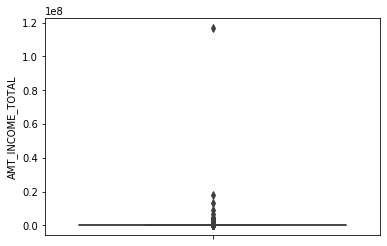

In [52]:
#AMT_INCOME_TOTAL - checking outliers using boxplot
sns.boxplot(data=df_app,y='AMT_INCOME_TOTAL')
plt.show

- we can clearly see the outlier so using quantile ti view data till 99%

<function matplotlib.pyplot.show(*args, **kw)>

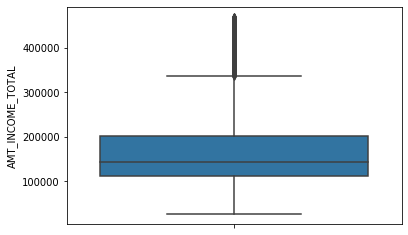

In [53]:
datacheck=df_app[df_app['AMT_INCOME_TOTAL']<df_app['AMT_INCOME_TOTAL'].quantile(.99)]
sns.boxplot(data=datacheck,y='AMT_INCOME_TOTAL')
plt.show

In [54]:
df_app['AMT_INCOME_TOTAL'].quantile([.3,.5,.7,.9,.95,.98,.99,1])

0.30       112500.0
0.50       147150.0
0.70       180000.0
0.90       270000.0
0.95       337500.0
0.98       427500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [55]:
df_app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [56]:
#checking the entry which has max value
df_app[df_app.AMT_INCOME_TOTAL==df_app.AMT_INCOME_TOTAL.max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,12615,922,6762.0,3643,1,1,0,1,0,0,Laborers,3,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Findings: AMT_INCOME_TOTAL - Outlier present
- its very clear from the above analysis that max value 117000000  is an oulier.
- as its a univariant outlier, we can impute the value with median or mean

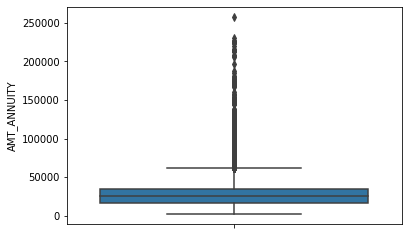

In [57]:
#AMT_ANNUITY - checking outliers
sns.boxplot(data=df_app,y='AMT_ANNUITY')
plt.show()

In [58]:
df_app.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

## Findings:AMT_ANNUITY - Outlier present
- its very clear from the box plot and description that max value 258025.5  is an oulier.
- we can impute the value with mean/median

In [59]:
#DAYS_BIRTH - for Checking outliers age of clients converting from days to year.
df_app['DAYS_BIRTH_YEAR']=df_app['DAYS_BIRTH']/365


In [60]:
# creating new column to show DAYS_BIRTH_YEAR in year
df_app['DAYS_BIRTH_YEAR']=df_app['DAYS_BIRTH_YEAR'].astype(int)
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,0.0,NaN,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54


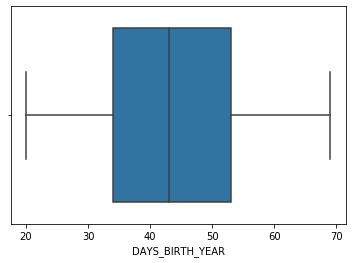

In [61]:
sns.boxplot(data=df_app,x='DAYS_BIRTH_YEAR')
plt.show()

In [62]:
df_app.DAYS_BIRTH_YEAR.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH_YEAR, dtype: float64

## Findings: DAYS_BIRTH_YEAR - No Outlier 
- from describe also we can see that there is not much difference in mean and median and also between 75% and max

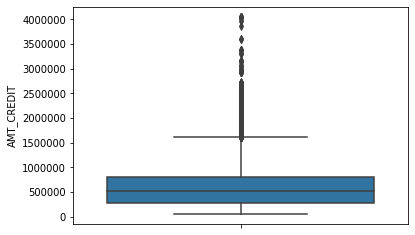

In [63]:
#AMT_CREDIT - checking Outliers
sns.boxplot(data=df_app,y='AMT_CREDIT')
plt.show()

In [64]:
df_app.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

## Findings: AMT_CREDIT - Outlier present
- its very clear from the box plot and description that there is a oulier after 37lakh, but most of the value is continuous

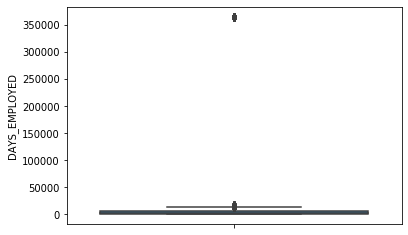

In [65]:
#DAYS_EMPLOYED - checking Outliers
sns.boxplot(data=df_app,y='DAYS_EMPLOYED')
plt.show()

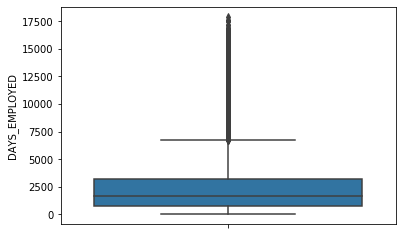

In [66]:
# using Quantile checking value till 90%
df_days_check=df_app[df_app['DAYS_EMPLOYED']<df_app['DAYS_EMPLOYED'].quantile(.90)]
sns.boxplot(data=df_days_check,y='DAYS_EMPLOYED')

In [67]:
df_app.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [68]:
#using quantile - binning and checking the values
df_app['DAYS_EMPLOYED'].quantile([0,0.3,0.5,0.7,.8,.85,0.9,0.95])

0.00         0.0
0.30      1132.0
0.50      2219.0
0.70      4435.0
0.80      9188.0
0.85    365243.0
0.90    365243.0
0.95    365243.0
Name: DAYS_EMPLOYED, dtype: float64

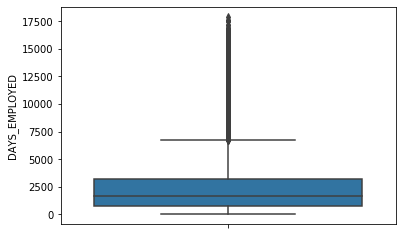

In [69]:
#checking boxplot without invalid value
sns.boxplot(data=df_app[df_app['DAYS_EMPLOYED']!=365243],y='DAYS_EMPLOYED')

In [70]:
# checking count of rows with invalid value
df_app[df_app['DAYS_EMPLOYED']==365243].DAYS_EMPLOYED.value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

# Findings - DAYS_EMPLOYED-Outliers present
- we can find outliers in 'DAYS_EMPLOYED'. and this is a invalid number-'365243', which about 1000year not a valid value.
- we cant drop this rows because 55374 rows are filled with this number.
- as this is a continuous outlier - binning will be the best option

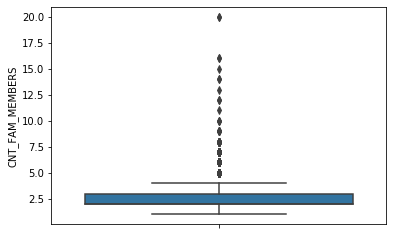

In [71]:
#CNT_FAM_MEMBERS - checking ooutliers
sns.boxplot(data=df_app,y='CNT_FAM_MEMBERS')
plt.show()

In [72]:
df_app['CNT_FAM_MEMBERS'].describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

# Findings -CNT_FAM_MEMBERS- Outliers Present
- its very clear that max value is an outlier
- we can do binning to avoid the outlier

## Binning of Data

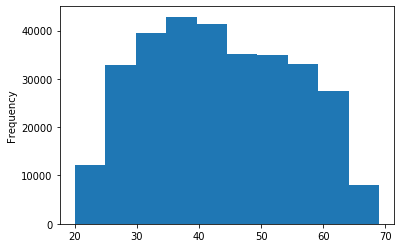

In [73]:
#DAYS_BIRTH_YEAR-binning
df_app.DAYS_BIRTH_YEAR.plot.hist()
plt.show()

In [74]:
#checking the unique values in DAYS_BIRTH_YEAR
dfage=df_app.DAYS_BIRTH_YEAR.unique()
np.sort(dfage)

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
      dtype=int64)

In [75]:
#binning the values
df_app['AGE_BIN']=pd.cut(df_app['DAYS_BIRTH_YEAR'],bins=[0,30,40,50,60,70],labels=['<30','30-40','40-50','50-60','>60'])

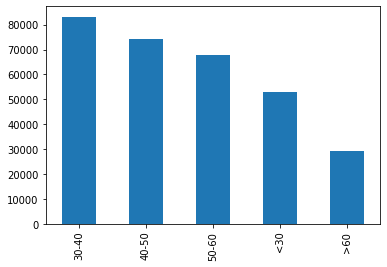

In [76]:
#plotting graph to show the counts of clients in each age bin
df_app['AGE_BIN'].value_counts().plot.bar()
plt.show()

In [77]:
#Binning-AMT_INCOME_TOTAL
df_app.AMT_INCOME_TOTAL.value_counts()


1.350000e+05    35750
1.125000e+05    31019
1.575000e+05    26556
1.800000e+05    24719
9.000000e+04    22483
2.250000e+05    20698
2.025000e+05    16341
6.750000e+04    11147
2.700000e+05    10827
8.100000e+04     6001
3.150000e+05     5862
2.475000e+05     5344
1.260000e+05     4668
3.600000e+05     4115
1.215000e+05     3848
9.900000e+04     3633
2.925000e+05     3418
1.035000e+05     3330
7.650000e+04     3146
1.440000e+05     3123
1.710000e+05     2647
4.500000e+05     2435
1.170000e+05     2390
5.400000e+04     2319
7.200000e+04     2187
1.665000e+05     2053
4.500000e+04     2043
1.080000e+05     1946
3.375000e+05     1790
9.450000e+04     1747
1.620000e+05     1702
1.890000e+05     1691
4.050000e+05     1660
8.550000e+04     1514
1.485000e+05     1486
2.160000e+05     1406
1.305000e+05     1256
5.850000e+04     1182
6.300000e+04     1145
1.935000e+05     1061
1.530000e+05     1012
2.115000e+05      985
3.825000e+05      966
1.395000e+05      834
1.755000e+05      800
5.400000e+

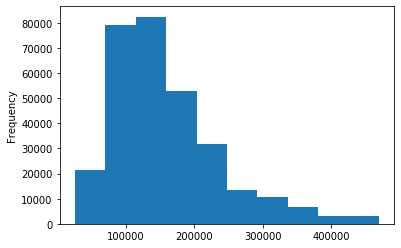

In [78]:
# we findout that this column has outliers, so taking values till 90%
dfcheck=df_app[df_app.AMT_INCOME_TOTAL<df_app.AMT_INCOME_TOTAL.quantile(.99)]
dfcheck.AMT_INCOME_TOTAL.plot.hist()
plt.show()

In [79]:
df_app['AMT_INCOME_TOTAL'].quantile([0,0.3,0.5,0.7,0.9,0.95])

0.00     25650.0
0.30    112500.0
0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [80]:
#binning value into buckets and avoiding outliers
df_app['INCOME_BIN']=pd.qcut(df_app['AMT_INCOME_TOTAL'],q=[0,0.2,0.4,0.6,0.8,0.99],labels=['low','below Avg','Average','Above Avg','High'])

In [81]:
#checking new columns created using binning
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEAR,AGE_BIN,INCOME_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,<30,Above Avg
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60,low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,0.0,NaN,0.0,52,50-60,below Avg
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54,50-60,below Avg


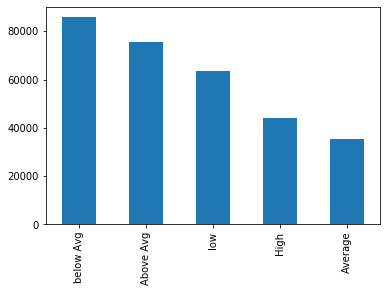

In [82]:
#plotting graph to show the counts of clients in each income bin
df_app.INCOME_BIN.value_counts().plot.bar()
plt.show()

# Analysis

## Imbalance Percentage
-checking imbalace % of data

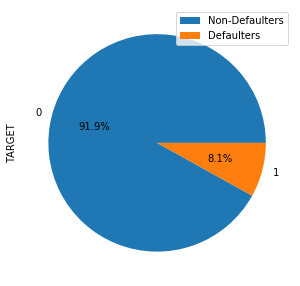

In [83]:
plt.figure(figsize=(10,5))
df_app.TARGET.value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(['Non-Defaulters','Defaulters'])
plt.show()

## Imbalace percentage is high so dividing the dataset based upon 'TARGET' variable

In [84]:
df_1=df_app[df_app['TARGET']==1]
df_0=df_app[df_app['TARGET']==0]

## Univariant Analysis on categorical & numerical variables

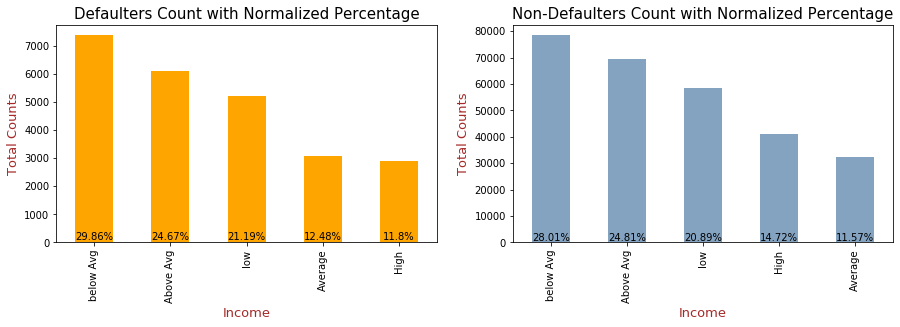

In [85]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.INCOME_BIN.value_counts().plot.bar(color='orange')
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Income',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Defaulters Count with Normalized Percentage",{'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_1.INCOME_BIN.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.INCOME_BIN.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Income',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Non-Defaulters Count with Normalized Percentage",{'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_0.INCOME_BIN.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.show()

- more clients are belong to below average and above average category
- clients belong to below avg and low income category likely belong to defaulters
- best to choose is high and above avg category income people

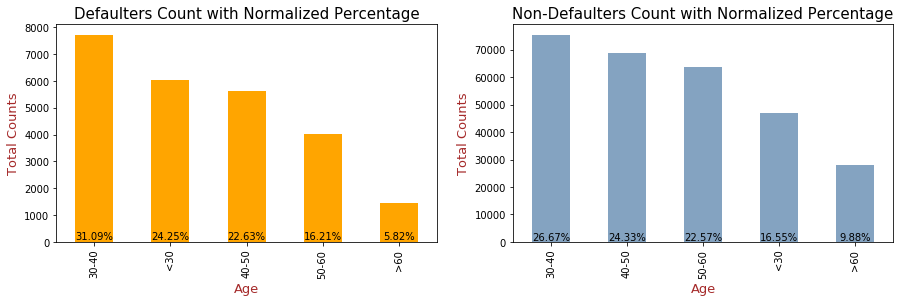

In [86]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.AGE_BIN.value_counts().plot.bar(color='orange')
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Age',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Defaulters Count with Normalized Percentage",{'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_1.AGE_BIN.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.AGE_BIN.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Age',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Non-Defaulters Count with Normalized Percentage",{'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_0.AGE_BIN.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.show()

- clients between 30-50 age group mostly taking loans
- 20-40 age group is mostly belong to defaulter
- better to choose 40 years above clients.

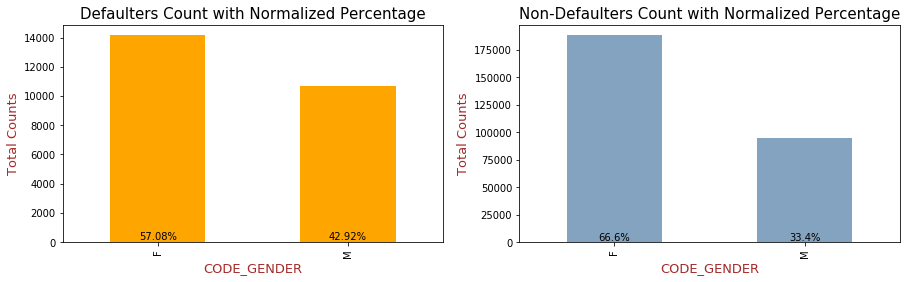

In [87]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.CODE_GENDER.value_counts().plot.bar(color='orange')
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('CODE_GENDER',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_1.CODE_GENDER.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.CODE_GENDER.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('CODE_GENDER',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Non-Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_0.CODE_GENDER.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.show()

- Females are mostlt taking loans
- Males are mostly belongs to defaulters
- Female group has higher repayment percentage.

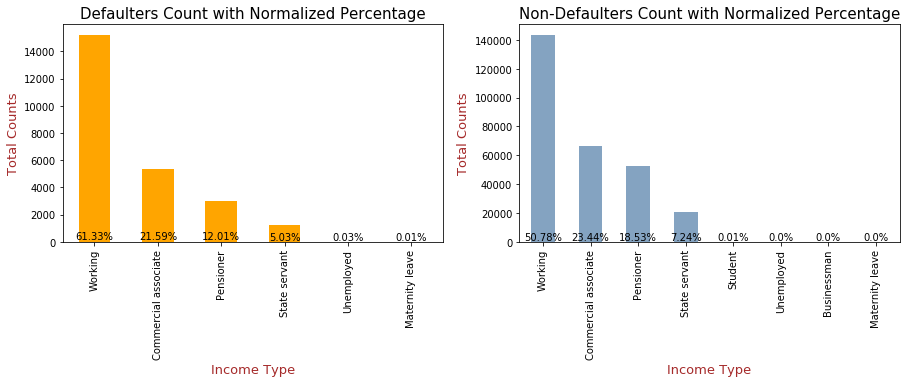

In [88]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.NAME_INCOME_TYPE.value_counts().plot.bar(color='orange')
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Income Type',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_1.NAME_INCOME_TYPE.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.NAME_INCOME_TYPE.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Income Type',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Non-Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_0.NAME_INCOME_TYPE.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.show()

- working category people are mostly taking loans
- working category mostly belong to defaulters
- eventhough the counts are very less to compare, but student and businessman categories  are not present in defaulter list
- pensioner is a good option to choose

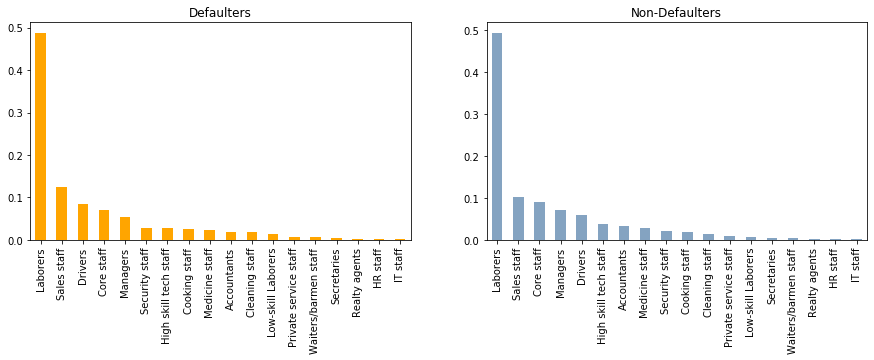

In [89]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar(color='orange')
plt.title("Defaulters")

plt.subplot(1,2,2)
df_0.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar(color=(0.2,0.4,0.6,0.6))
plt.title("Non-Defaulters")
plt.show()

- this graph doesnt provide much insights

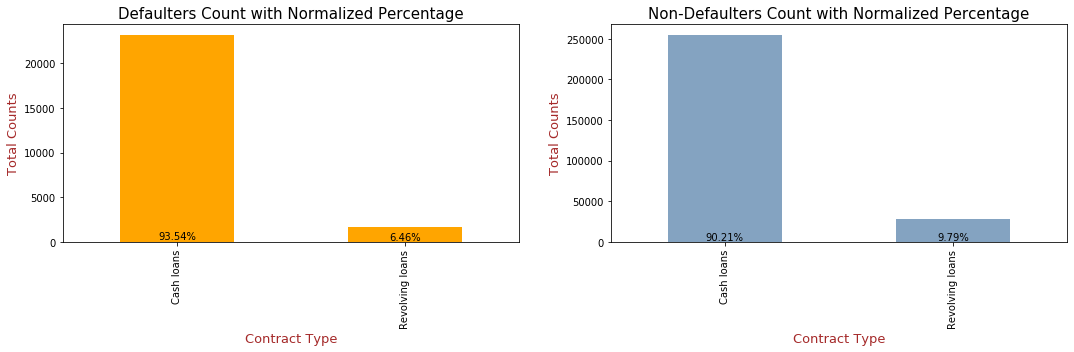

In [90]:
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
df_1.NAME_CONTRACT_TYPE.value_counts().plot.bar(color='orange')
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Contract Type',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.NAME_CONTRACT_TYPE.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Contract Type',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Non-Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.show()

- most people are choosing cash loans are contract type.
- most of the cash loaners are belong to defaulters.

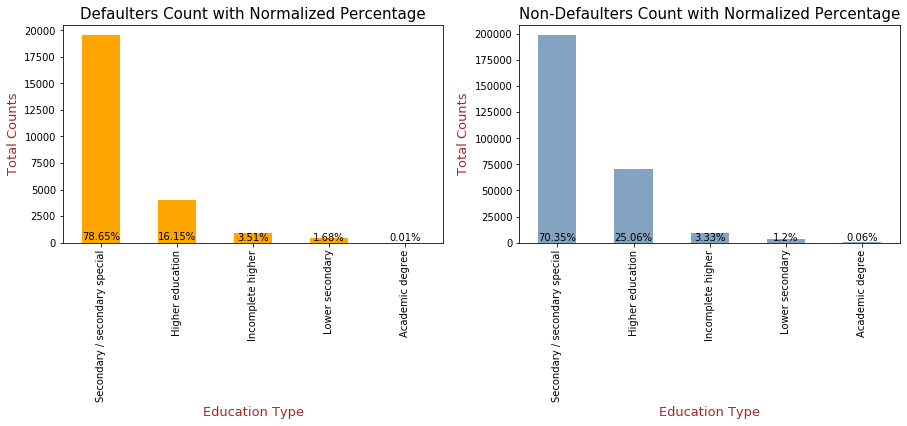

In [91]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.NAME_EDUCATION_TYPE.value_counts().plot.bar(color='orange')
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Education Type',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.NAME_EDUCATION_TYPE.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Education Type',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Non-Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.show()

- most of the clients belong to secondary educations.
- defaulters high in secondary education and other lower education.
- its better to approve loan for higher education clients

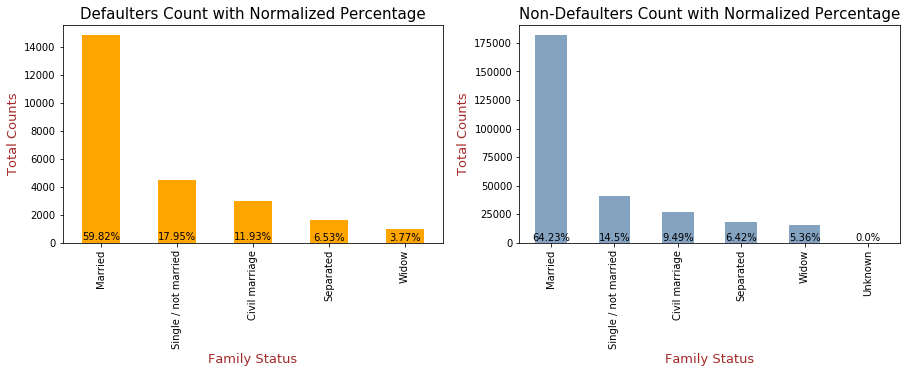

In [92]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.NAME_FAMILY_STATUS.value_counts().plot.bar(color='orange')
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Family Status',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_1.NAME_FAMILY_STATUS.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.NAME_FAMILY_STATUS.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Family Status',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Non-Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_0.NAME_FAMILY_STATUS.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.show()

- mostly married people taking loans
- single people mostly belong to defaulters

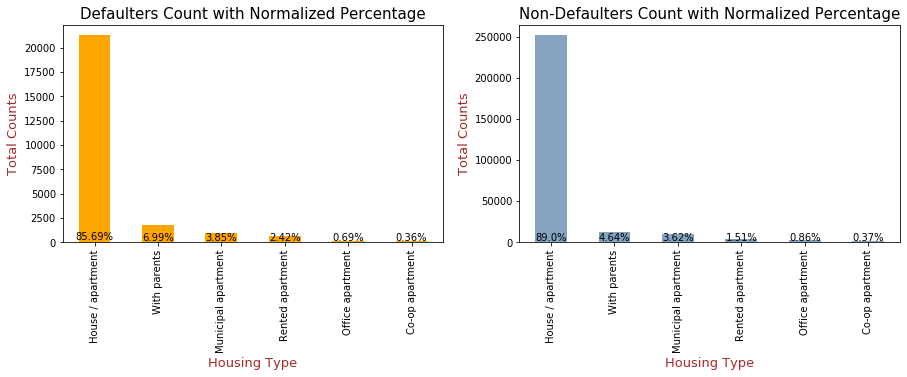

In [93]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.NAME_HOUSING_TYPE.value_counts().plot.bar(color='orange')
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Housing Type',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_1.NAME_HOUSING_TYPE.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.NAME_HOUSING_TYPE.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('Housing Type',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Non-Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_0.NAME_HOUSING_TYPE.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.show()

- people having house/apartments mostly taking loans.
- people with parents are belonging to defaulters

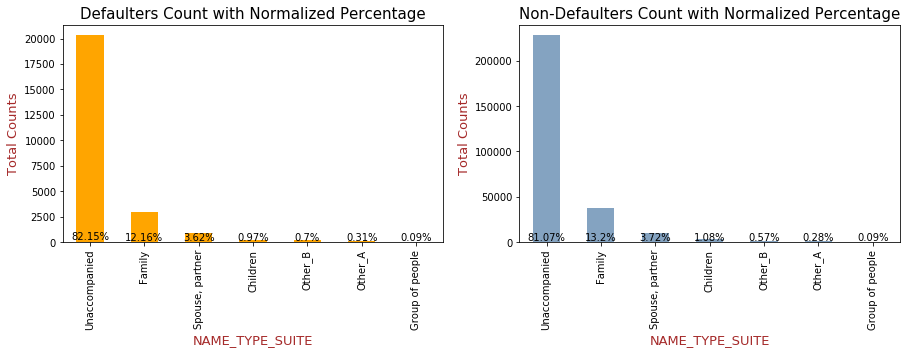

In [94]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.NAME_TYPE_SUITE.value_counts().plot.bar(color='orange')
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('NAME_TYPE_SUITE',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_1.NAME_TYPE_SUITE.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.NAME_TYPE_SUITE.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('NAME_TYPE_SUITE',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.title("Non-Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
for index,value in enumerate(df_0.NAME_TYPE_SUITE.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.show()

- this variable doesnt provide much insights.

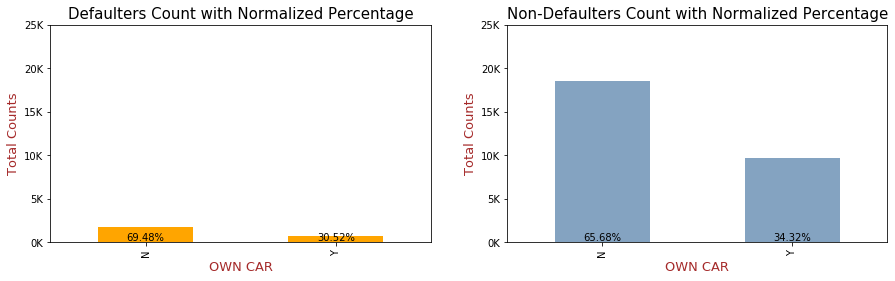

In [95]:
# FLAG_OWN_CAR vs TARGET
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.FLAG_OWN_CAR.value_counts().plot.bar(color='orange')
ticks=np.arange(0,300000,50000)
labels=["{}K".format(i//10000) for i in ticks]
plt.yticks(ticks,labels)
plt.title("Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('OWN CAR',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
for index,value in enumerate(df_1.FLAG_OWN_CAR.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.FLAG_OWN_CAR.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
ticks=np.arange(0,300000,50000)
labels=["{}K".format(i//10000) for i in ticks]
plt.yticks(ticks,labels)
plt.title("Non-Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('OWN CAR',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
for index,value in enumerate(df_0.FLAG_OWN_CAR.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
plt.show()

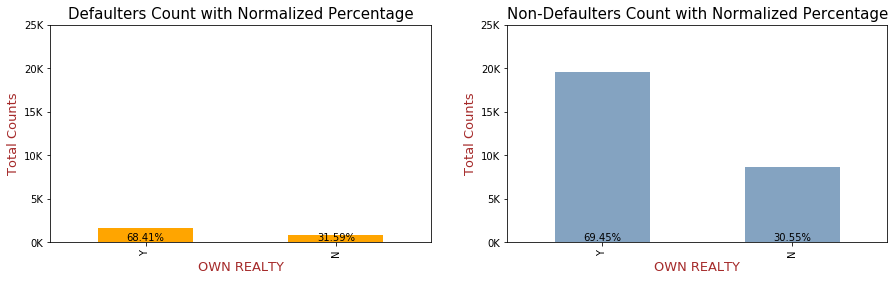

In [96]:
# FLAG_OWN_REALTY vs TARGET
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
df_1.FLAG_OWN_REALTY.value_counts().plot.bar(color='orange')
ticks=np.arange(0,300000,50000)
labels=["{}K".format(i//10000) for i in ticks]
plt.yticks(ticks,labels)
plt.title("Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('OWN REALTY',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
for index,value in enumerate(df_1.FLAG_OWN_REALTY.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
    
plt.subplot(1,2,2)
df_0.FLAG_OWN_REALTY.value_counts().plot.bar(color=(0.2,0.4,0.6,0.6))
ticks=np.arange(0,300000,50000)
labels=["{}K".format(i//10000) for i in ticks]
plt.yticks(ticks,labels)
plt.title("Non-Defaulters Count with Normalized Percentage",fontdict={'fontsize':15,'fontweight':4,'color':'black'})
plt.ylabel('Total Counts',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
plt.xlabel('OWN REALTY',fontdict={'fontsize':13,'fontweight':4,'color':'Brown'})
for index,value in enumerate(df_0.FLAG_OWN_REALTY.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom',color='black')
plt.show()

- from the above observation, we understood that most of the Non-Defaulters owns car or realty.

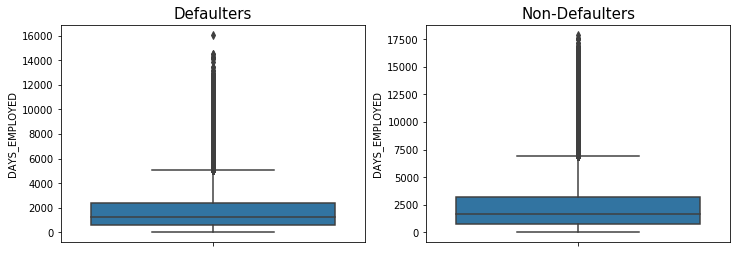

In [97]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(data=df_1[df_1['DAYS_EMPLOYED']!=365243],y='DAYS_EMPLOYED')
plt.title('Defaulters',fontdict={'fontsize':15,'fontweight':4,'color':'black'})
plt.subplot(1,2,2)
sns.boxplot(data=df_0[df_0['DAYS_EMPLOYED']!=365243],y='DAYS_EMPLOYED')
plt.title('Non-Defaulters',fontdict={'fontsize':15,'fontweight':4,'color':'black'})
plt.show()

- better to choose clients have high working experience
- freshers are mostly belong to defaulters

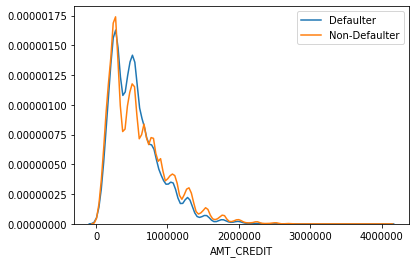

In [98]:

sns.distplot(df_1['AMT_CREDIT'],hist=False,label='Defaulter')
sns.distplot(df_0['AMT_CREDIT'],hist=False,label='Non-Defaulter')
plt.show()

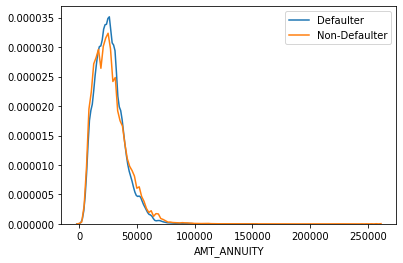

In [99]:
sns.distplot(df_1['AMT_ANNUITY'],hist=False,label='Defaulter')
sns.distplot(df_0['AMT_ANNUITY'],hist=False,label='Non-Defaulter')
plt.show()

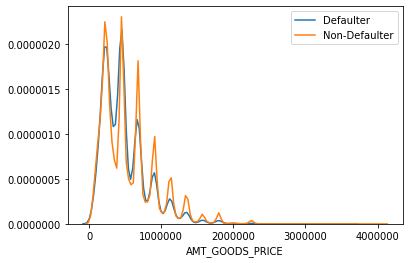

In [100]:
sns.distplot(df_1['AMT_GOODS_PRICE'],hist=False,label='Defaulter')
sns.distplot(df_0['AMT_GOODS_PRICE'],hist=False,label='Non-Defaulter')
plt.show()

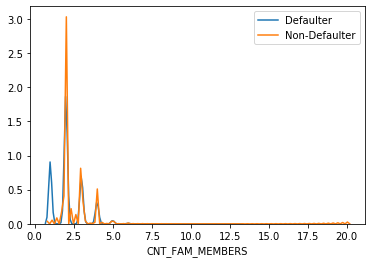

In [101]:
sns.distplot(df_1['CNT_FAM_MEMBERS'],hist=False,label='Defaulter')
sns.distplot(df_0['CNT_FAM_MEMBERS'],hist=False,label='Non-Defaulter')
plt.show()

##### Univariant Analysis on Numerical variable:
  -more people are taking loans belong to low goods price, low annuity and low credits

## Segment Univarient Analysis

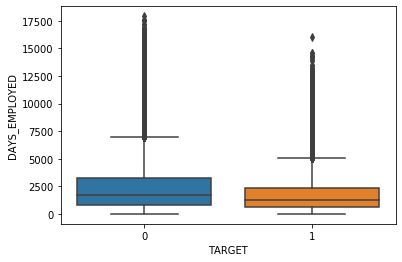

In [102]:
df_days_check=df_app[df_app['DAYS_EMPLOYED']<df_app['DAYS_EMPLOYED'].quantile(.99)]
sns.boxplot(data=df_days_check,y='DAYS_EMPLOYED',x='TARGET')
plt.show()

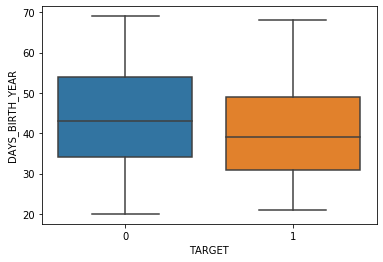

In [103]:
sns.boxplot(data=df_app,y='DAYS_BIRTH_YEAR',x='TARGET')
plt.show()

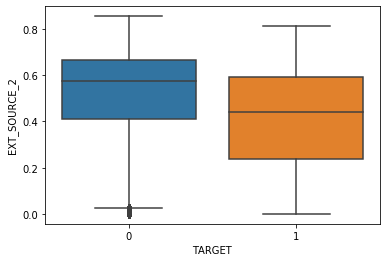

In [104]:
# Comparing External score VS TARGET
sns.boxplot(data=df_app,y='EXT_SOURCE_2',x='TARGET')
plt.show()

- People with more external score are less defaulted.
- older people and people with high work experience are less chance to be a defaulter

## Bivariant & Multivariant Analysis

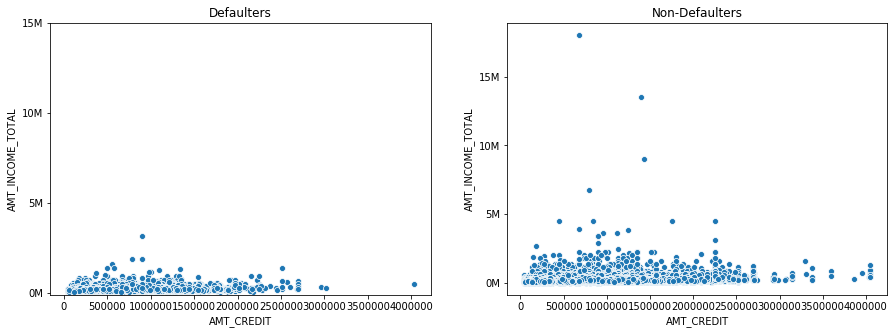

In [105]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_1[df_1['SK_ID_CURR']!=114967],x='AMT_CREDIT',y='AMT_INCOME_TOTAL')
plt.title("Defaulters")
ticks=np.arange(0,20000000,5000000)
labels=["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks,labels)
plt.subplot(1,2,2)
sns.scatterplot(data=df_0[df_0['SK_ID_CURR']!=114967],x='AMT_CREDIT',y='AMT_INCOME_TOTAL')
plt.title("Non-Defaulters")
ticks=np.arange(0,20000000,5000000)
labels=["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

- low income people are belonging to defaulters most
- non-Defaulter have more spread for income and credit- showing have high credit and high income

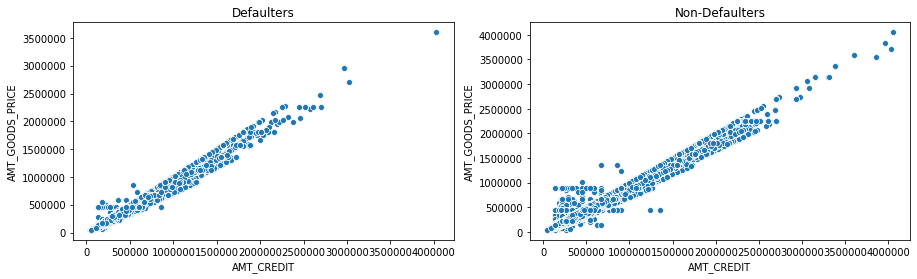

In [106]:
#AMT_CREDIT VS AMT_GOODS_PRICE
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.scatterplot(data=df_1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Defaulters')
plt.subplot(1,2,2)
sns.scatterplot(data=df_0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Non-Defaulters')
plt.show()

- AMT_CREDIT and AMT_GOODS_PRICE as a good linear relatioship- when good price increases credit amount also increasing.
- mostly Non-Defaulters are belongs to high amount credit.

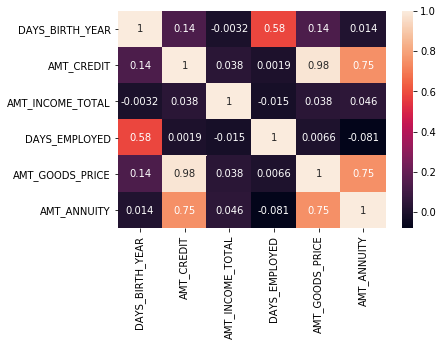

In [107]:
#correlation matrix for Defaulters
sns.heatmap(df_1[['DAYS_BIRTH_YEAR','AMT_CREDIT','AMT_INCOME_TOTAL','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_ANNUITY']].corr(),annot=True)
plt.show()

In [108]:
#Top 12 correlation -Defaulters Segment
corr_info=df_app[df_app['TARGET']==1].corr()
top_corr=corr_info.where(np.triu(np.ones(corr_info.shape),k=1).astype(np.bool))
top_corr=top_corr.unstack()
test=top_corr.sort_values(ascending=False)
test.head(12)

DAYS_BIRTH_YEAR              DAYS_BIRTH                    0.999691
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998269
AMT_GOODS_PRICE              AMT_CREDIT                    0.982783
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.885484
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.868994
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.778540
AMT_GOODS_PRICE              AMT_ANNUITY                   0.752295
AMT_ANNUITY                  AMT_CREDIT                    0.752195
DAYS_BIRTH_YEAR              DAYS_EMPLOYED                 0.582441
DAYS_EMPLOYED                DAYS_BIRTH                    0.582185
dtype: float64

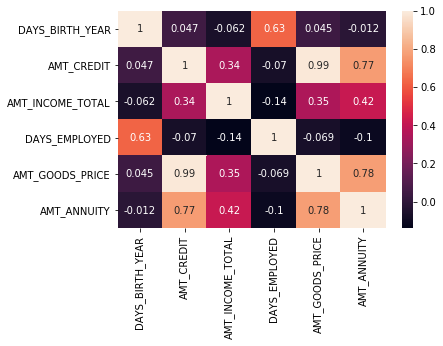

In [109]:
#correlation matrix for Non-Defaulters
sns.heatmap(df_0[['DAYS_BIRTH_YEAR','AMT_CREDIT','AMT_INCOME_TOTAL','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_ANNUITY']].corr(),annot=True)
plt.show()

In [110]:
#Top 12 correlation - Non-Defaulters Segment
corr_info=df_app[df_app['TARGET']==0].corr()
top_corr=corr_info.where(np.triu(np.ones(corr_info.shape),k=1).astype(np.bool))
top_corr=top_corr.unstack()
test=top_corr.sort_values(ascending=False)
test.head(12)

DAYS_BIRTH_YEAR              DAYS_BIRTH                    0.999711
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998508
AMT_GOODS_PRICE              AMT_CREDIT                    0.987022
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.859332
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.830381
AMT_GOODS_PRICE              AMT_ANNUITY                   0.776421
AMT_ANNUITY                  AMT_CREDIT                    0.771297
DAYS_EMPLOYED                DAYS_BIRTH                    0.626114
DAYS_BIRTH_YEAR              DAYS_EMPLOYED                 0.626028
dtype: float64

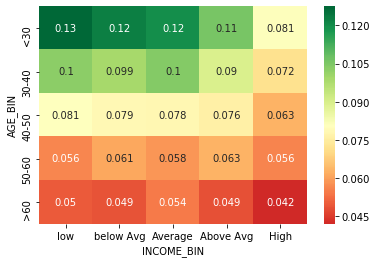

In [111]:
#Heatmap for Income VS Age VS Target
res=pd.pivot_table(data=df_app,columns='INCOME_BIN',index='AGE_BIN',values='TARGET')
sns.heatmap(res,annot=True,center=0.0807,cmap='RdYlGn')
plt.show()

- its clear from the above graph that defaulters are belongs to low-Average salary and 20-40 range age
- the best category to approve loan are elder people(50 & above) and average-high income.`

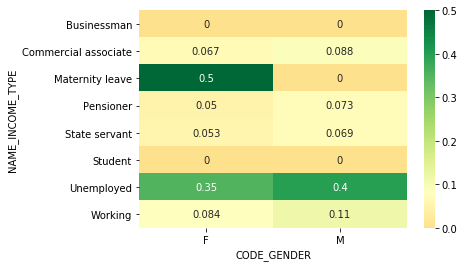

In [112]:
#Heatmap for Gender VS Income type Vs Targer
res_income=pd.pivot_table(data=df_app,columns='CODE_GENDER',index='NAME_INCOME_TYPE',values='TARGET')
sns.heatmap(res_income,annot=True,cmap='RdYlGn',center=0.0807)
plt.show()

- Default categories include- people who are in maternity leave & unemployed people.
- working Men also not a save category to provide loan
- good category to provide loan - business people, female pensioner , female state servent.
- student are not considering because it may be education loan.

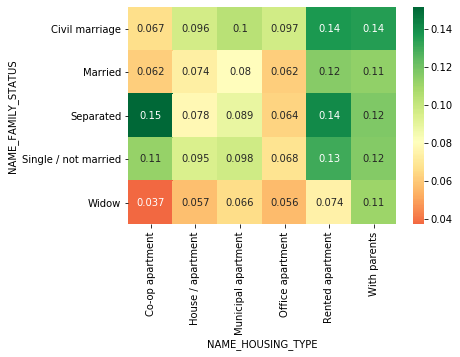

In [113]:
res1=pd.pivot_table(data=df_app[df_app['NAME_FAMILY_STATUS']!='Unknown'],columns='NAME_HOUSING_TYPE',index='NAME_FAMILY_STATUS',values='TARGET')
sns.heatmap(res1,annot=True,cmap='RdYlGn',center=0.0807)
plt.show()

- People staying in Rented apartment or with parents are more likely to belong defaulters.
- Separated people also not a good option.

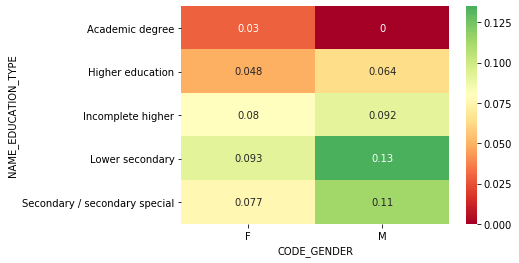

In [114]:
# Heatmap- CODE_GENDER VS NAME_EDUCATION_TYPE VS TARGET
res=pd.pivot_table(data=df_app,columns='CODE_GENDER',index='NAME_EDUCATION_TYPE',values='TARGET')
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.0807)
plt.show()

- Male person with lower education likely to belong to defaulters.
- Females with higher education is a good option to provide the loan.

# Analysis - Previous application Data

In [115]:
#checking previous application data
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#checking rows and columns
df_prev.shape

(1670214, 37)

In [117]:
#checking data structure of the dataset
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [118]:
#checking missing value percentage
null_perc=df_prev.isnull().mean().mul(100)
null_perc.sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [119]:
#dropping all the columns which have .40 and above missing values
df_prev=df_prev.loc[:,df_prev.isnull().mean()<.40]

In [120]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [121]:
#merging the application data and previous application data
df=pd.merge(df_app,df_prev,how='left',on='SK_ID_CURR')

In [122]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEAR,AGE_BIN,INCOME_BIN,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,<30,Above Avg,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,High,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,High,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,High,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60,low,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0

In [123]:
df.shape

(1430155, 81)

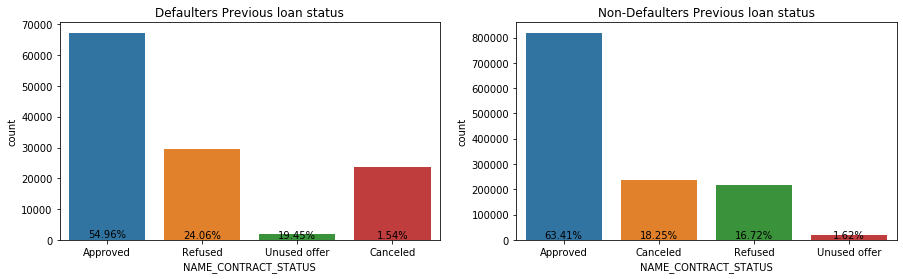

In [124]:

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=df[df['TARGET']==1],x='NAME_CONTRACT_STATUS')
plt.title("Defaulters Previous loan status")
for index,value in enumerate(df[df['TARGET']==1].NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.subplot(1,2,2)    
sns.countplot(data=df[df['TARGET']==0],x='NAME_CONTRACT_STATUS')
plt.title("Non-Defaulters Previous loan status")
for index,value in enumerate(df[df['TARGET']==0].NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100).round(2)):
    plt.text(index,value,str(value)+'%',ha='center',va='bottom')
plt.show()

- In defaulted segment above 50% clients have approved loan earlier. and 18% clinets in non-defaulted segment have refused loan
- more clients who have approved loan earlier in non default segment

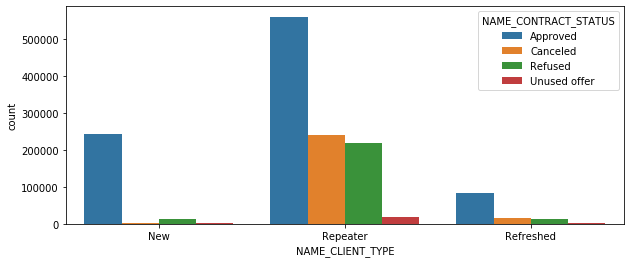

In [125]:
plt.figure(figsize=(10,4))
sns.countplot(data=df[df['NAME_CLIENT_TYPE']!='XNA'],x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS')
plt.show()

- Repeater customer is mainly applying for loan.

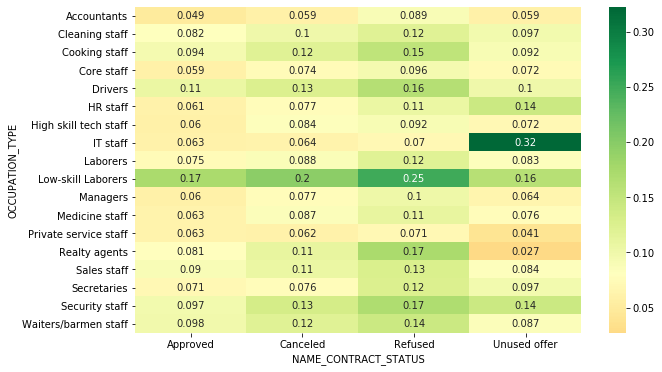

In [126]:
# Heatmap NAME_CONTRACT_STATUS vs OCCUPATION_TYPE vs TARGET
plt.figure(figsize=(10,6))
res=pd.pivot_table(data=df,columns='NAME_CONTRACT_STATUS',index='OCCUPATION_TYPE',values='TARGET')
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.0807)
plt.show()

- most of the clients who have refused loans earlier are belonging in defaulter
- low skill laborers are more likely to belong in defaulter

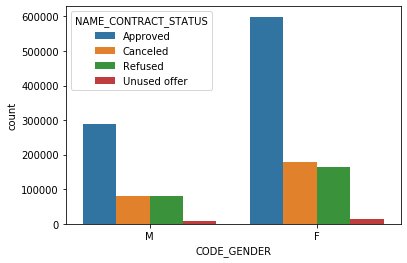

In [127]:
#CODE_GENDER Vs NAME_CONTRACT_STATUS
sns.countplot(data=df,x=df['CODE_GENDER'],hue='NAME_CONTRACT_STATUS')
plt.show()

- Females are mainly approving for loan and getting approval also

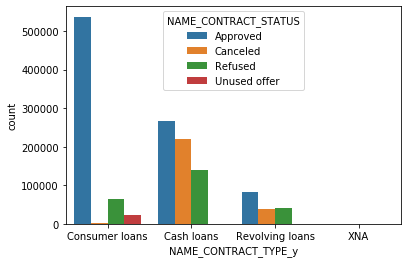

In [128]:
# NAME_CONTRACT_STATUS Vs NAME_CONTRACT_TYPE_y
sns.countplot(data=df[df['NAME_CONTRACT_STATUS']!='XNA'],x=df['NAME_CONTRACT_TYPE_y'],hue='NAME_CONTRACT_STATUS')
plt.show()

- Consumer loans are mainly approved

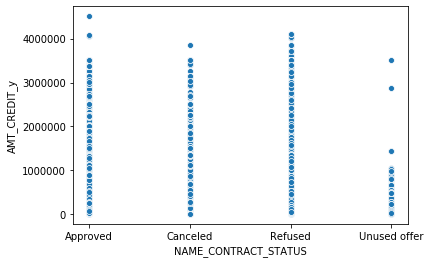

In [129]:
#NAME_CONTRACT_STATUS Vs AMT_CREDIT_y
sns.scatterplot(data=df,x='NAME_CONTRACT_STATUS',y='AMT_CREDIT_y')
plt.show()

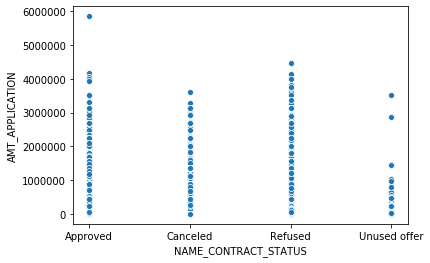

In [130]:
#NAME_CONTRACT_STATUS VsAMT_APPLICATION
sns.scatterplot(data=df,x='NAME_CONTRACT_STATUS',y='AMT_APPLICATION')
plt.show()

- higher credit and total amount loans are mostly rejected previously

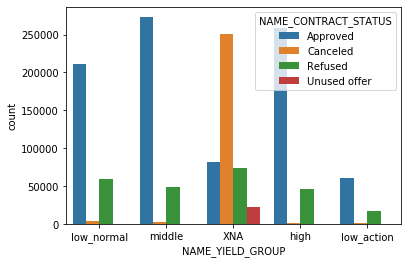

In [131]:

sns.countplot(data=df[df['NAME_CONTRACT_STATUS']!='XNA'],x=df['NAME_YIELD_GROUP'],hue='NAME_CONTRACT_STATUS')
plt.show()

- middle and high interest rate loans are mostly approving

# Insights:

### Important variable which differentiate the defaulters and non-defaulters:
- AMT_TOTAL_INCOME - people with high income are good category to provide loan.
- CODE_GENDER - Females are less tend to be a defaulter
- NAME_EDUCATION_TYPW - People with high educatio is best category to provide loan.
- DAYS_BIRTH - Clients above 40 are good catergory to provide loan
- NAME_FAMILY_STATUS - Single people are more tend to be in defaulters.
- NAME_HOUSING_TYPE - people having housing/apartments are good category to provide loan
- DAYS_EMPLOYED - People with more work experience are best category to provide loan
- EXT_SOURCE_2 - People with high external score are good category to provide loan
- FLAG_OWN_CAR & FLAG_OWN_REALTY - owning a car or realty is plus point.
- INCOME_TYPE - Commercial associate or pensioner or businessman are good option to provide loan
- AMT_CREDIT or AMT_GOODS_PRICE - people having high amount of credit or goods price is less tend to be in defaulter.
- NAME_CONTRACT_STATUS - we can check the client have taken loan before or not.

### Category which tend to be in Defaulter:
- young people with low income.
- people who are in maternity leave & unemployed
- people who are in rented apartments/ with parents
- single/civil marriage people also not a good option
- Males with lower education
- low skilled laboures
- people who have refused loans earlier

### Category which can provide loan:
- elder pensioners
- Female with higher education
- businessman and state servent people
- older people with higher income
- loan with high credit or goods price
- people who have approved loans and repeater ealier